# Random Forest Regression

## Importing the libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [30]:
dataset = pd.read_csv('drag_coef.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [32]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the Test set results

In [33]:
y_pred = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.59e+00 1.49e+00]
 [2.13e+01 2.20e+01]
 [1.16e+01 1.17e+01]
 [4.30e+01 6.23e+01]
 [1.45e+00 1.26e+00]
 [2.01e+01 1.92e+01]
 [1.09e+02 8.22e+01]
 [2.07e+02 2.24e+02]
 [1.30e+00 1.00e+00]
 [4.96e+01 5.26e+01]
 [2.87e+02 2.96e+02]
 [6.16e+01 6.92e+01]
 [1.57e+00 1.45e+00]
 [7.61e+01 1.07e+02]
 [7.35e+01 7.48e+01]
 [3.59e+00 5.42e+00]
 [1.31e+01 1.36e+01]
 [1.60e+00 1.03e+00]
 [3.26e+00 3.84e+00]
 [3.22e+02 2.69e+02]
 [1.36e+00 8.61e-01]
 [6.41e+00 6.20e+00]
 [1.05e+02 1.16e+02]
 [7.69e+00 5.61e+00]
 [1.23e+01 1.26e+01]
 [1.40e+02 1.44e+02]
 [4.04e+00 4.95e+00]
 [1.42e+00 1.84e+00]
 [1.20e+00 1.29e+00]
 [2.87e+00 2.06e+00]
 [1.20e+00 8.64e-01]
 [1.33e+00 1.17e+00]
 [7.92e+00 7.14e+00]
 [2.34e+00 2.57e+00]
 [1.34e+01 1.12e+01]
 [5.02e+01 3.72e+01]
 [3.27e+00 2.56e+00]
 [7.49e+01 7.10e+01]
 [2.58e+00 3.12e+00]
 [2.48e+01 2.55e+01]
 [5.69e+00 5.73e+00]
 [1.80e+01 3.76e+01]
 [1.19e+00 1.18e+00]
 [4.66e+01 4.18e+01]
 [1.67e+00 1.88e+00]
 [1.48e+00 1.10e+00]
 [1.82e+00 1.51e+00]
 [5.55e+00 5.

## Evaluating the Model Performance

In [34]:
from sklearn.metrics import r2_score, mean_squared_error
print('R_2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('MSE for Training set:', mean_squared_error(y_train, y_pred_train))
print('R_2 score for Training set:',r2_score(y_train, y_pred_train))

R_2 Score : 0.9163039470088328
Mean Squared Error : 2314.294640914941
MSE for Training set: 1332.1837893905595
R_2 score for Training set: 0.9782734784395334


##Plotting Results

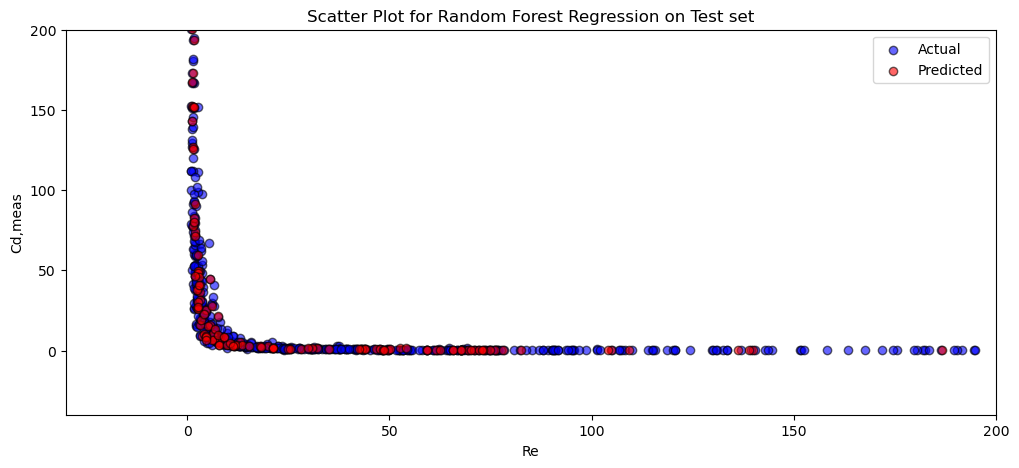

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred ,X_test[:,-1], c = 'red' , edgecolors='black', alpha=0.6,label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 200)
plt.xlim(-30, 200)
plt.title('Scatter Plot for Random Forest Regression on Test set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

In [36]:
print('R_2 Score :', r2_score(y_pred, X_test[:,-1]))

R_2 Score : -13.816768577668052


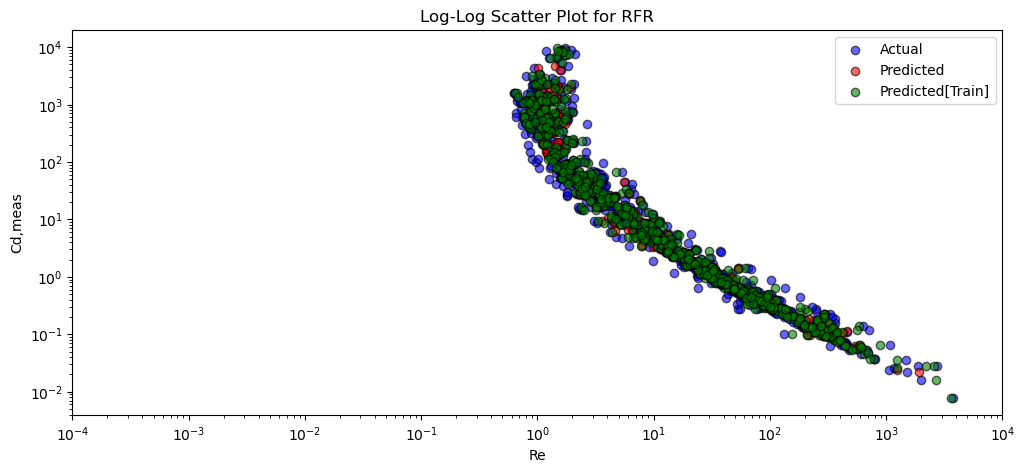

In [43]:
plt.figure(figsize=(12, 5))

plt.scatter(y, X[:, -1], c='blue',edgecolors='black', alpha=0.6, label='Actual')
plt.scatter(y_pred, X_test[:, -1], c='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted[Train]')
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.0001,10000)
plt.title('Log-Log Scatter Plot for RFR')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()
plt.show()

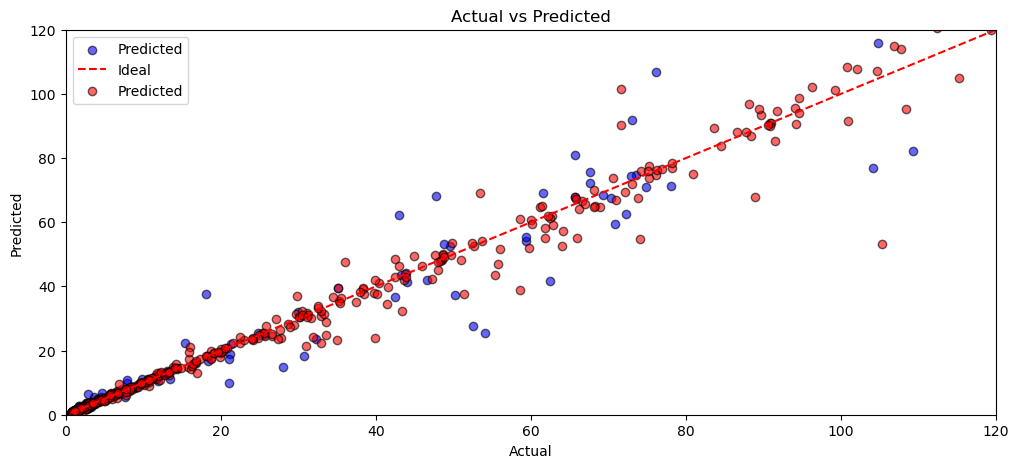

In [38]:
plt.figure(figsize=(12,5))
plt.scatter(y_pred,y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train,y_train, color='red',edgecolors='black', alpha=0.6, label='Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

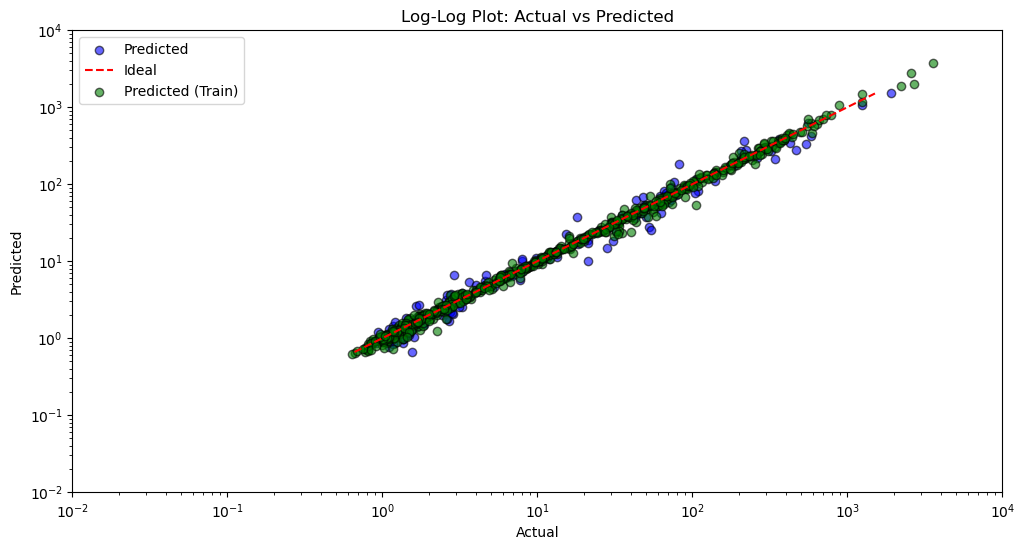

In [39]:
plt.figure(figsize=(12, 6))

plt.scatter(y_pred, y_test, color='blue',edgecolors='black', alpha=0.6, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.scatter(y_pred_train, y_train, color='green',edgecolors='black', alpha=0.6, label='Predicted (Train)')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.ylim(0.01,10000)
plt.xlim(0.01,10000)

plt.title('Log-Log Plot: Actual vs Predicted')
plt.legend()

plt.show()

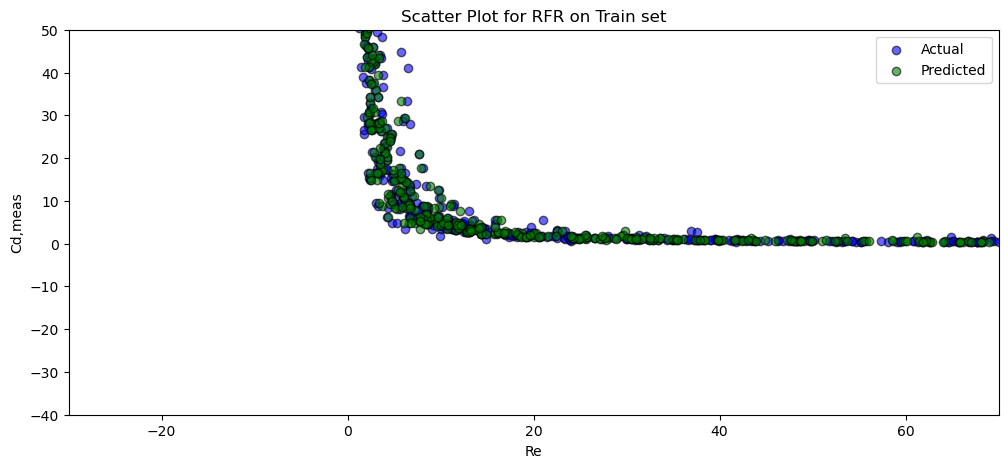

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.scatter( y ,X[:,-1], c = 'blue'  ,edgecolors='black', alpha=0.6, label = 'Actual')
plt.scatter( y_pred_train ,X_train[:,-1], c = 'green' ,edgecolors='black', alpha=0.6, label = 'Predicted')
##plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.ylim(-40, 50)
plt.xlim(-30, 70)
plt.title('Scatter Plot for RFR on Train set')
plt.ylabel('Cd,meas')
plt.xlabel('Re')
plt.legend()

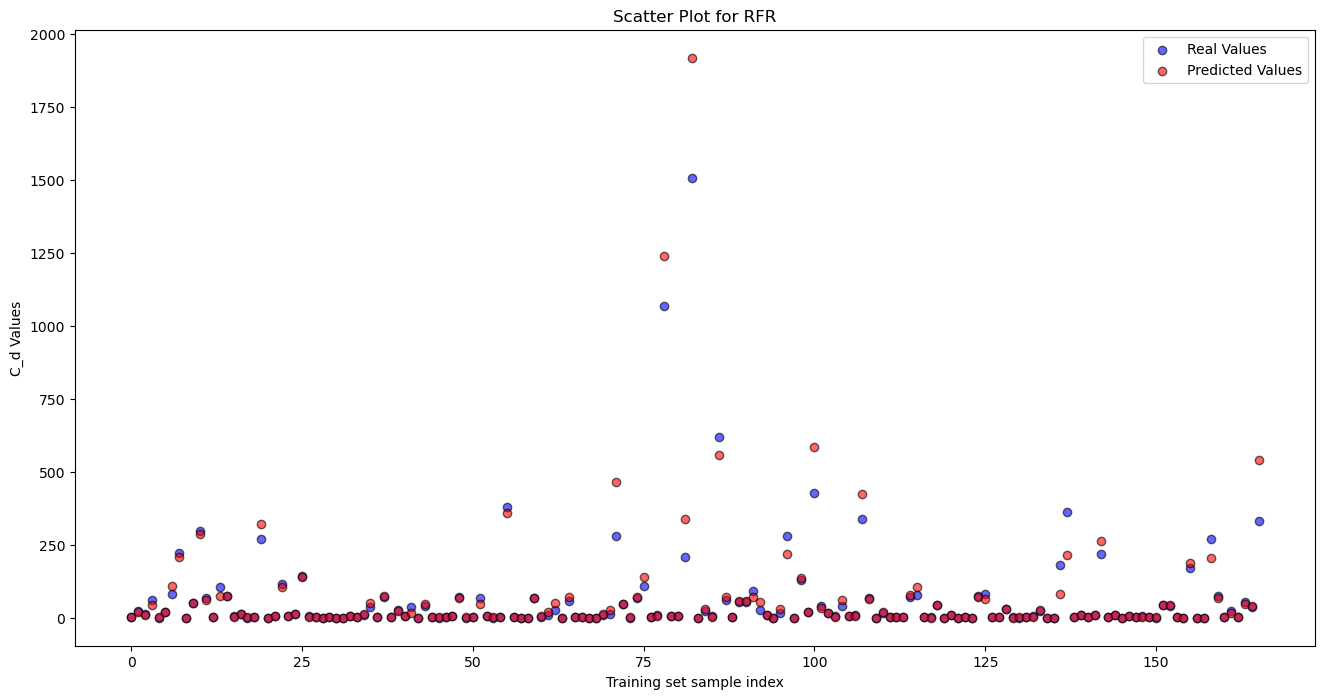

In [41]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_test)), y_test, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred)), y_pred , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for RFR')
plt.xlabel('Training set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()

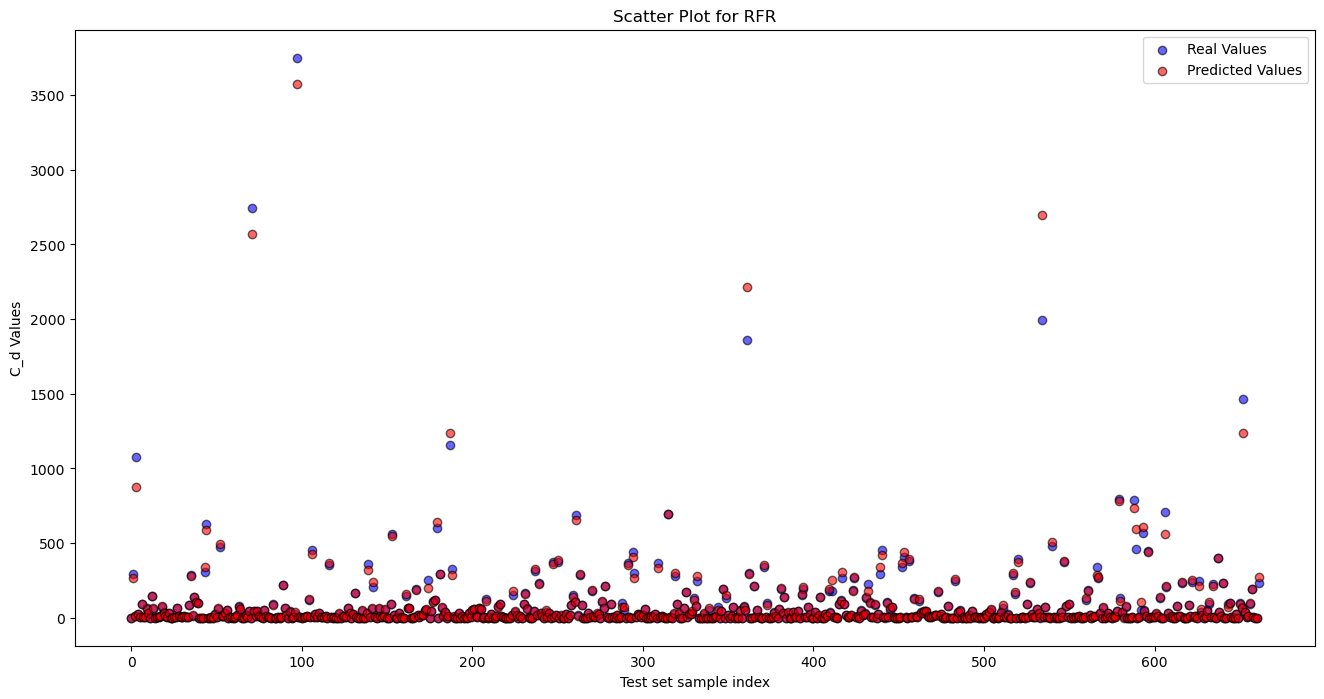

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(range(len(y_train)), y_train, color = 'blue',edgecolors='black', alpha=0.6,label='Real Values')
plt.scatter(range(len(y_pred_train)), y_pred_train , color = 'red',edgecolors='black', alpha=0.6,label='Predicted Values')
plt.title('Scatter Plot for RFR')
plt.xlabel('Test set sample index')
plt.ylabel('C_d Values')
plt.legend()
plt.show()